# Mouting data from google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd drive/My\ Drive/Autodrive_for_Nhut_Phu

/content/drive/My Drive/Autodrive_for_Nhut_Phu


# Install neccessary modules

- h5py(for saving h5)
- PIL to loading image into np array

## Install Pillow

In [ ]:
!pip install Pillow

In [ ]:
from os import listdir
from os.path import isfile, join
image_path = "./image_dir/"
onlyfiles = [f for f in listdir(image_path) if isfile(join(image_path, f))]

images = []

for pic in onlyfiles:
  images.append(image_path + pic)

from PIL import Image
from numpy import asarray

arr_images = []

for image in images:
  _img = Image.open(image)
  data = asarray(_img)
  arr_images.append(data)

## Install h5py

In [ ]:
!pip install h5py

In [ ]:
!touch sample_dataset.h5

In [ ]:
import h5py
f = h5py.File("sample_dataset.h5", "w")
dset = f.create_dataset("images", data=arr_images)
f.close()

# Create a function to convert jpg to h5

In [17]:
from PIL import Image
from numpy import asarray
import h5py
from os import listdir
from os.path import isfile, join

def convert_image_to_dataset(img_dir, annotate_dir, img_dataset, annotate_dataset):
  """
  This function will convert every image in image directory into array then store it in h5 file named by img_dataset.
  Same goes for annotate image

  Param:
  - img_dir - String - directory of images.
  - annotate_dir - String - directory of annotate.
  - img_dataset - String - name of h5 file to store image dataset.
  - annotate_dataset - String - name of h5 file to store annotate dataset.

  convert_image_to_dataset("./image_dir/", "./annotate_dir/", "image_dataset.h5", "annotate_dataset.h5")
  
  This will store every images in "./image_dir/" to file "image_dataset.h5", and every images in "./annotate_dir/"
  in file "annotate_dataset.h5"
  """
  img_name_arr = [f for f in listdir(img_dir) if isfile(join(img_dir,f))]

  pic_arr = []
  ant_arr = []

  for img_name in img_name_arr:
    pic = Image.open(img_dir + img_name)
    ant = Image.open(annotate_dir + img_name)

    pic_np_array = asarray(pic)
    ant_np_array = asarray(ant)

    pic_arr.append(pic_np_array)
    ant_arr.append(ant_np_array)

  pic_dataset = h5py.File(img_dataset, "w")
  pic_dataset.create_dataset("image", data=pic_arr)
  pic_dataset.close()

  ant_dataset = h5py.File(annotate_dataset, "w")
  ant_dataset.create_dataset("annotate", data=ant_arr)
  ant_dataset.close()

  print(pic_arr)

In [ ]:
convert_image_to_dataset("./image_dir/","./annotate_dir/","image_ds.h5","annotate_ds.h5")

# To load the image back from dataset h5

The first element input to dataset ds is the index of picture we want to see

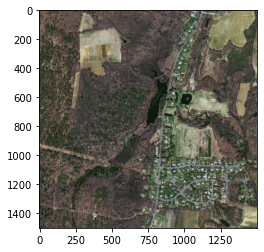

In [40]:
import numpy
f = h5py.File("image_ds.h5","r")
ds = f['image']
arr = numpy.array(ds[1,:,:])
image = Image.fromarray(arr)
f.close()

from matplotlib import pyplot
pyplot.imshow(image)
pyplot.show()

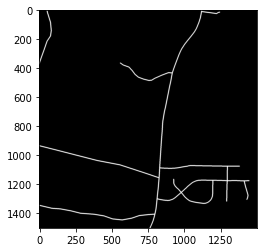

In [41]:
f1 = h5py.File("annotate_ds.h5", "r")
ds1 = f1['annotate']
image = Image.fromarray(ds1[1,:,:])
f1.close()

pyplot.imshow(image)
pyplot.show()